In [26]:
import datetime

now = datetime.datetime.now().strftime("%Y-%m-%d_%H%M")
HOT_TOPIC_RAW_FILE_NAME = "hottopic_" + now + ".html"
HOT_TOPIC_CLOUD_IMAGE_NAME = "HotWordCloud_SlackChannel_" + now + ".png"

In [27]:
print(HOT_TOPIC_RAW_FILE_NAME)
print(HOT_TOPIC_CLOUD_IMAGE_NAME)

hottopic_2017-05-17_1738.html
HotWordCloud_SlackChannel_2017-05-17_1738.png


In [28]:
# Fetch Raw Data
#

# using localhost
#
#!wget -O - 'http://localhost:5000/slack/channels.history?channel=C2V7A502V' > $HOT_TOPIC_RAW_FILE_NAME
#!wget -O - 'http://localhost:5000/slack/channels.history?channelname=eis-aws-support' > $HOT_TOPIC_RAW_FILE_NAME

# using ngrok - http://e5ed2197.ngrok.io/
# eis-aws-support
#!wget -O - 'http://e5ed2197.ngrok.io/slack/channels.history?channel=C2V7A502V' > $HOT_TOPIC_RAW_FILE_NAME
#!wget -O - 'http://e5ed2197.ngrok.io/slack/channels.history?channelname=eis-aws-support' > $HOT_TOPIC_RAW_FILE_NAME

# edu-oxygen-analytics
#!wget -O - 'http://e5ed2197.ngrok.io/slack/channels.history?channelname=edu-oxygen-analytics' > $HOT_TOPIC_RAW_FILE_NAME

# adsk-announcements
!wget -O - 'http://e5ed2197.ngrok.io/slack/channels.history?channelname=adsk-announcements' > $HOT_TOPIC_RAW_FILE_NAME


--2017-05-17 17:38:13--  http://e5ed2197.ngrok.io/slack/channels.history?channelname=adsk-announcements
Resolving e5ed2197.ngrok.io... 52.15.183.149, 2600:1f16:59e:b200:f152:bf63:c2ce:89d4
Connecting to e5ed2197.ngrok.io|52.15.183.149|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256834 (251K) [text/html]
Saving to: ‘STDOUT’

-                   100%[===================>] 250.81K  --.-KB/s    in 0.02s   

2017-05-17 17:38:25 (11.3 MB/s) - written to stdout [256834/256834]



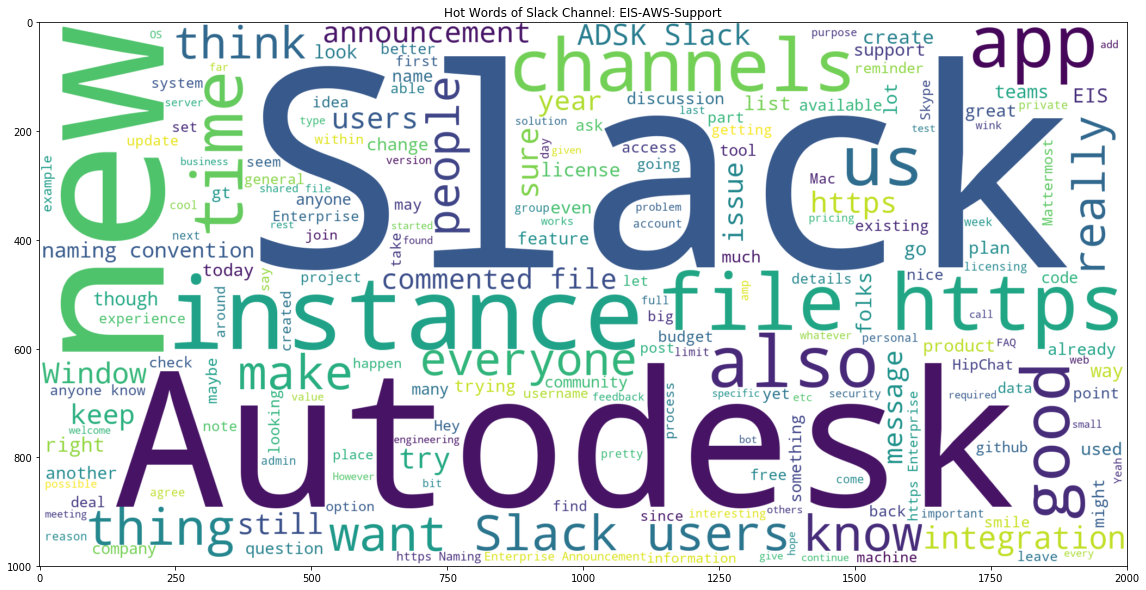

In [29]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk

%matplotlib inline 

# Open data
data = open(HOT_TOPIC_RAW_FILE_NAME,'r').read()

# clean data
text = BeautifulSoup(data, 'html.parser').get_text()

# set the nltk data path and tokenize
nltk.data.path.append('./nltk_data/')  
cleaned = nltk.word_tokenize(text)
wordlist = [x for x in cleaned if (len(x) >= 2 and x.isalpha())]

# set STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["hi", "yes", "need", "needs", "will", "thank", "thanks", "please", "channel"])
stopwords.update(["now", "team", "one", "ms", "help", "use", "user", "using", "work", "working"])
stopwords.update(["ok", "done", "see", "well", "joined"])

# generate hot word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=2000, height=1000).generate(" ".join(wordlist))

# set figure size
# using '$ jupyter notebook --generate-config' to comment out and change 'c.NotebookApp.iopub_data_rate_limit'
plt.figure(figsize=(20,10)) # for quick research and test
#plt.figure(figsize=(100,50)) # for high resoluiton report

# set plt options
plt.title('Hot Words of Slack Channel: EIS-AWS-Support')
plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.tight_layout(pad=0)

# Show or Save figure as file
#plt.show()
plt.savefig(HOT_TOPIC_CLOUD_IMAGE_NAME)

